# COVID-19 deaths in South Korea

*March 22, 2022*

The COVID-19 situation in South Korea is looking pretty grim. For a story on surging numbers there, I put together this very quick graphic for a story. First we import pandas for analysis and read in OWID's data.

In [23]:
import pandas as pd

raw = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

display(raw.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


I typically do line charts using a rolling 7 day average (it's easier to read and understand). So here we'll filter for South Korea's new deaths per day, and then build a separate column for rolling 7-day average of the same metric.

In [24]:
south_korea = (raw
                .loc[raw["location"] == "South Korea", ["date", "new_deaths"]]
                .set_index("date")
                .dropna()
                )

south_korea["rolling_deaths"] = (south_korea
                                    .loc[:, "new_deaths"]
                                    .rolling(7)
                                    .mean()
                                    )

From here, I like to plot it out very quickly to see if I have something interesting.

<AxesSubplot:xlabel='date'>

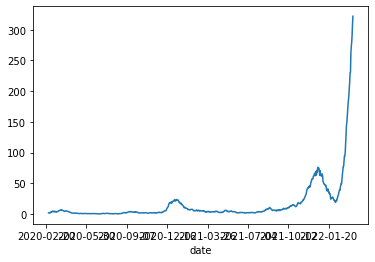

In [25]:
south_korea["rolling_deaths"].plot()

In this case: whoa. We definitely have something interesting. From here I copy/pasted the output to Datawrapper. [Here](https://www.datawrapper.de/_/jIG2C/)'s the final result.

\-30\-